### Basic Setting

In [1]:
data_dir = './data/project2_data/'
train_data = data_dir+'olid-training-v1.0.tsv'
test_data_file = data_dir+'testset-levela.tsv'
test_ans_file = data_dir+'labels-levela.csv'
import re
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
regex = re.compile('[^a-zA-Z]')

In [2]:
def process_sent(sent):
    segs = sent.split()
    remove = [regex.sub('', i) for i in segs]
    return remove

### Loading training data

In [3]:
first = True
vocab = {}
train_w = {}
train_label = {}
with open(train_data, 'r') as f:
    for line in f:
        if first:
            first = False
            continue
        segs = line.split('\t')
        id = segs[0]
        sent = segs[1]
        label = segs[2]
#         print(id, sent, label)
        sent = process_sent(sent)
        for w in sent:

            if w not in vocab:
                vocab[w] = {}
                vocab[w]['NOT'] = 0
                vocab[w]['OFF'] = 0
            
            vocab[w][label] += 1
        train_label[str(id)] = label
        train_w[str(id)] = sent

### Define score and condition

In [4]:
def count_score(sent):
    score = 0
    for w in sent:
        if w in vocab and vocab[w]['NOT'] < vocab[w]['OFF']:
            score += vocab[w]['OFF']/(vocab[w]['NOT']+vocab[w]['OFF'])
    return score/len(sent)

In [5]:
record = {
    'OFF': [],
    'NOT': []
}
for id in train_w:
    score = count_score(train_w[id])
    record[train_label[id]].append(score)

In [6]:
vocab['shit']

{'NOT': 30, 'OFF': 294}

### Show Score Distrubution

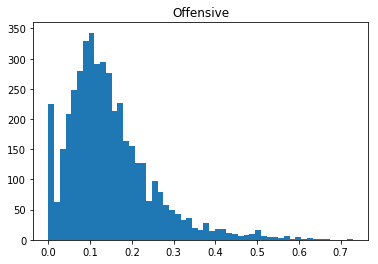

0.14648343119647989


In [7]:
plt.hist(record['OFF'], bins='auto')
plt.title("Offensive")
plt.show()
# print(len(record['OFF']))
print(sum(record['OFF'])/len(record['OFF']))

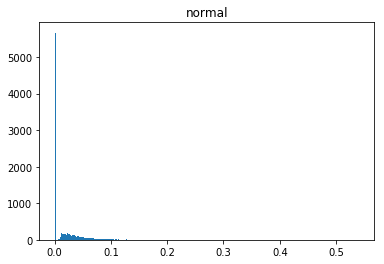

0.015870178065945244


In [8]:
plt.hist(record['NOT'], bins='auto')
plt.title("normal")
plt.show()
# print(len(record['NOT']))
print(sum(record['NOT'])/len(record['NOT']))

In [9]:
def predict(sent):
    if count_score(sent) > thres:
        return 'OFF'
    return 'NOT'

### Apply on testing data

In [10]:
thres = 0.04

In [11]:
train_predict = {}
for id in train_w:
    train_predict[id] = predict(train_w[id])

In [12]:
test_w = {}
with open(test_data_file, 'r') as f:
    first = True
    for line in f:
        if first:
            first = False
            continue
        segs = line.split('\t')
        id = segs[0]
        sent = segs[1]
        
        test_w[str(id)] = process_sent(sent)

In [13]:
test_predict = {}
for id in test_w:
    test_predict[id] = predict(test_w[id])

In [14]:
test_ans = {}
with open(test_ans_file, 'r') as f:
    for line in f:
        segs = line.strip().split(',')
        id = segs[0]
        label = segs[1]
        test_ans[id] = label

In [15]:
def count_f1(predict, ans, label):
    correct = 0
    total = 0
    for id in predict:
        if ans[str(id)] == label:
            total += 1
        if predict[str(id)] == label and ans[str(id)] == label:
            correct += 1
    acc = correct / len(predict)
    recall = correct / total
    print(acc, recall)
    return 2*acc*recall/(acc+recall)

### Result

In [16]:
train_label_list = list(train_label.values())
train_pre_list = list(train_predict.values())
print('train f1:', f1_score(train_label_list,train_pre_list
                            , labels=['OFF', 'NOT'], pos_label='OFF', average='macro'))

test_label_list = list(test_ans.values())
test_pre_list = list(test_predict.values())
print('test f1:', f1_score(test_label_list,test_pre_list
                            , labels=['OFF', 'NOT'], pos_label='OFF', average='macro'))

train f1: 0.862255935024546
test f1: 0.6636653832133754


/home/b05902066/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1052: UserWarning: Note that pos_label (set to 'OFF') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
